In [75]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [41]:
def generate_data(num_samples,m=2):

    # Generate x values
    x = np.random.uniform(0, 10, num_samples)
    
    # Generate y values with noise
    noise = np.random.normal(0, m*0.1, num_samples)
    y = m * x + noise
        
    return np.column_stack((x, y))

# Generate some example data
example_data = generate_data(10)
train_data = generate_data(200)
val_data = generate_data(200)

class TrendlineDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data
        x = torch.tensor(sample[idx][0], dtype=torch.float32)
        target = torch.tensor(sample[idx][1], dtype=torch.float32)
        return x, target

train_dataset = TrendlineDataset(train_data)
val_dataset = TrendlineDataset(val_data)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)


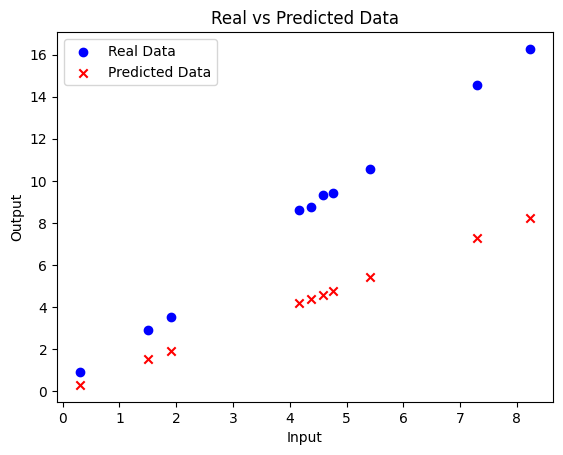

epoch 0, loss 2.059417724609375
epoch 1, loss 6.900810241699219
epoch 2, loss 1.4117177724838257
epoch 3, loss 15.223679542541504
epoch 4, loss 1.8753008842468262
epoch 5, loss 0.5315002202987671
epoch 6, loss 0.5319070219993591
epoch 7, loss 2.9737184047698975
epoch 8, loss 0.0878874883055687
epoch 9, loss 0.5776351094245911


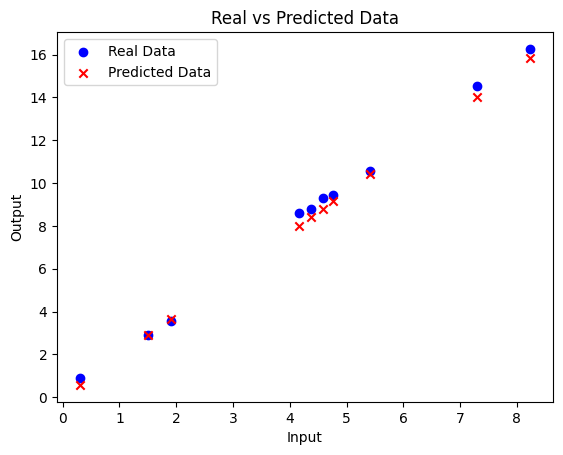

In [80]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.weights = torch.nn.Parameter(torch.ones(inputSize))
        
    def forward(self, x):
        out = self.weights * x 
        return out



def Train(model,train_loader, epochs,lr):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        for batch in train_loader:
            x,target = batch
            # print(x,target)        
            # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
            optimizer.zero_grad()
        
            # get output from the model, given the inputs
            outputs = model(x)
    
            # get loss for the predicted output
            loss = criterion(outputs, target)
            # print(loss)
            # get gradients w.r.t to parameters
            loss.backward()
    
            optimizer.step()
    
        print('epoch {}, loss {}'.format(epoch, loss.item()))

def visualise_predictions(model, data):
    real_points = np.array(data)  # Ensure data is a NumPy array
    pred_points = np.zeros_like(real_points)  # Initialize predictions array

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking for efficiency
        for i, point in enumerate(data):
            x = torch.tensor([point[0]], dtype=torch.float32)
            pred = model(x)
            pred_points[i] = np.array([point[0], pred.numpy()[0]])

    # Plot real vs predicted points
    plt.scatter(real_points[:, 0], real_points[:, 1], color='blue', label="Real Data")
    plt.scatter(pred_points[:, 0], pred_points[:, 1], color='red', label="Predicted Data", marker='x')
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.title("Real vs Predicted Data")
    plt.show()


input_size = 1
output_size = 1
learning_rate = 0.001
num_epochs = 10

model = linearRegression(input_size,output_size)
# Train(model,train_loader,num_epochs,learning_rate)
visualise_predictions(model,example_data)
Train(model,train_loader,num_epochs,learning_rate)
visualise_predictions(model,example_data)
